Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [27]:
results_dir = Path("../cv_results").resolve()
figure_dir = Path("../figures").resolve()

In [34]:
model_name_map = {
    "<class 'models.widrow_hoff.WidrowHoff'>" : "Widrow-Hoff",
    "<class 'models.linear_svm.LinearSVM'>" : "Linear SVM",
    "<class 'models.logistic_regression.LogisticRegression'>" : "Logistic Regression",
    "<class 'models.weston_watkins_svm.WestonWatkinsSVM'>" : "Weston-Watkins SVM",
}

dataset_name_map = {
    "iris" : "Iris",
    "titanic" : "Titanic",
    "breast_cancer" : "Breast Cancer",
}

parameters = {
    "Learning Rate" : "param_classifier__lr",
    "Epochs" : "param_classifier__max_epochs",
}

metrics = {
    "Mean Test CV Accuracy" : "mean_test_score",
    "Mean CV Fit Time (s)" : "mean_fit_time",
}

Load the results data.

In [29]:
results = {}

for file in results_dir.glob("*.csv"):
    dataset_name = "_".join(file.stem.split("_")[2:])

    df = pd.read_csv(file)

    df["param_classifier__model_class"] = df["param_classifier__model_class"].map(model_name_map)

    results[dataset_name] = df

ww_svm_results = results.pop("ww_svm")

# Binary Model Comparison

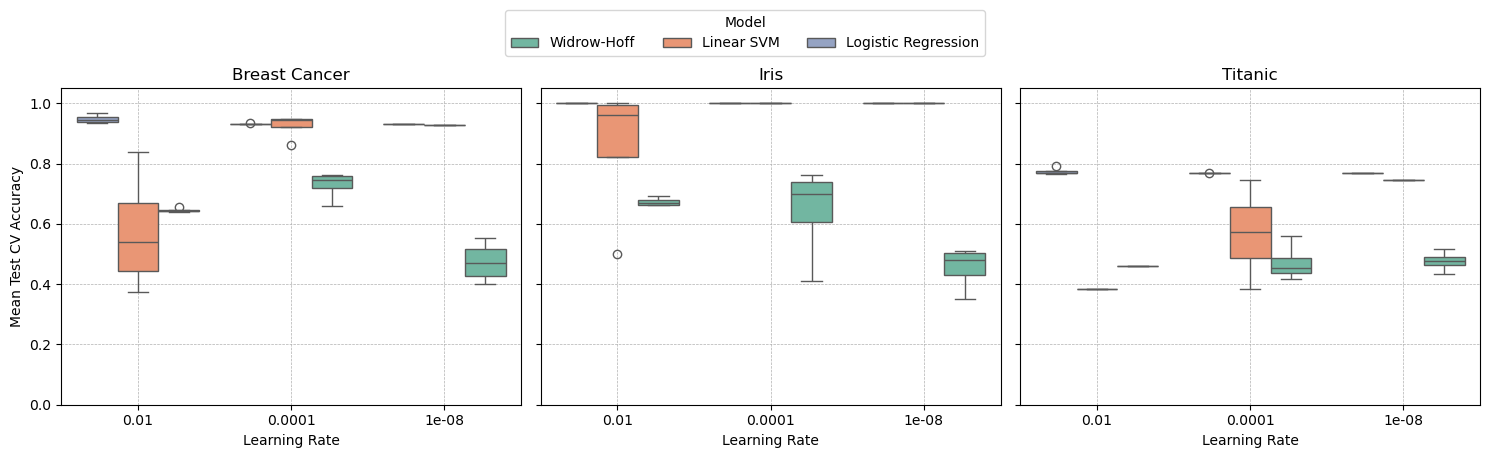

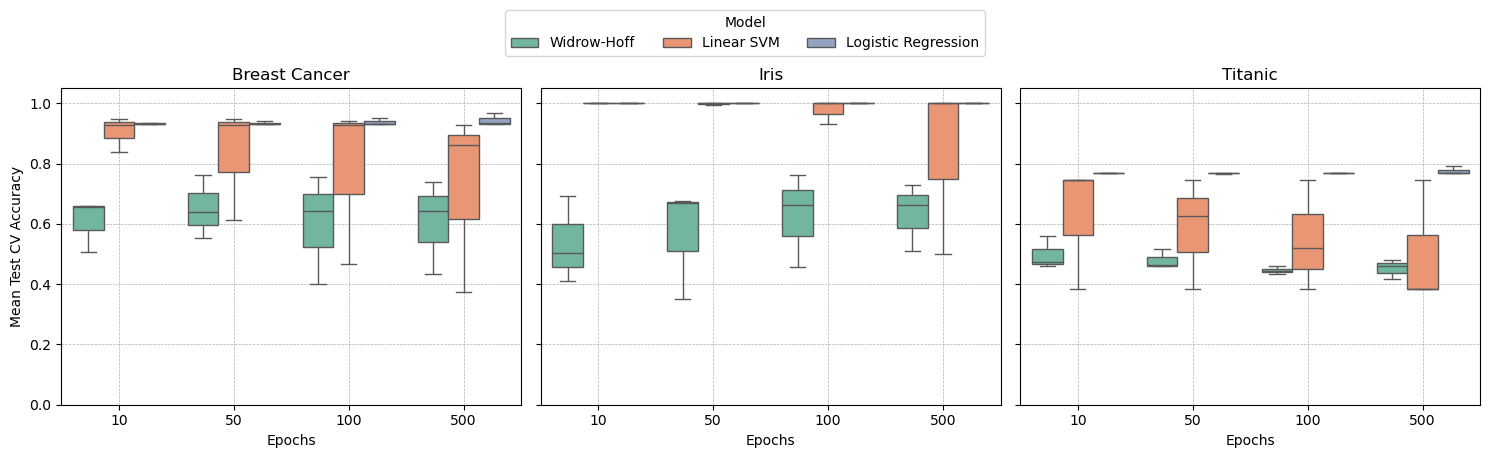

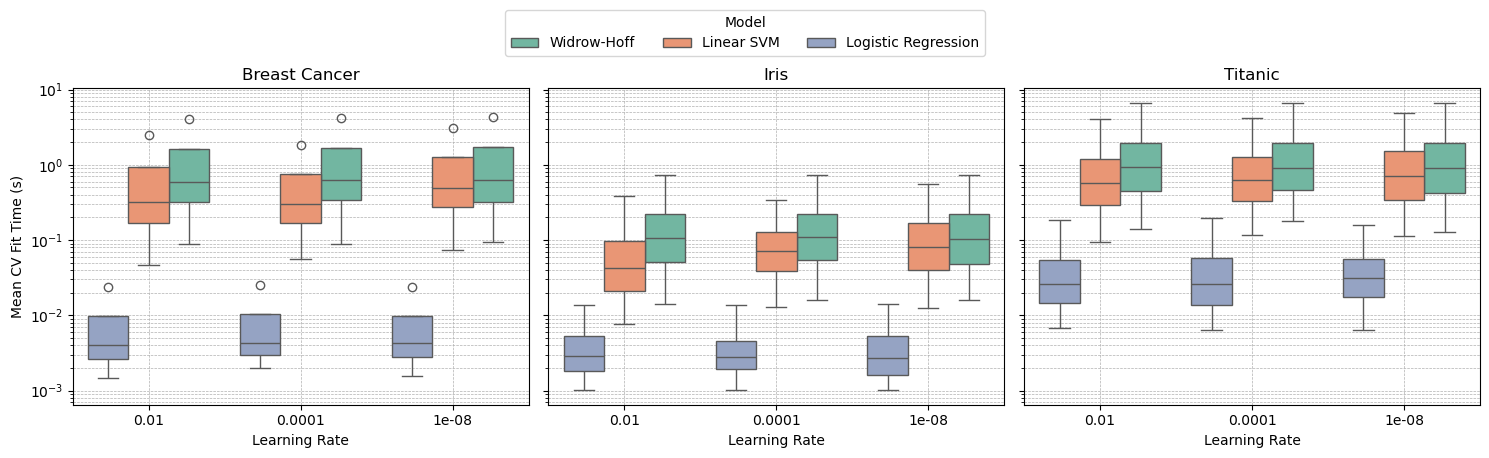

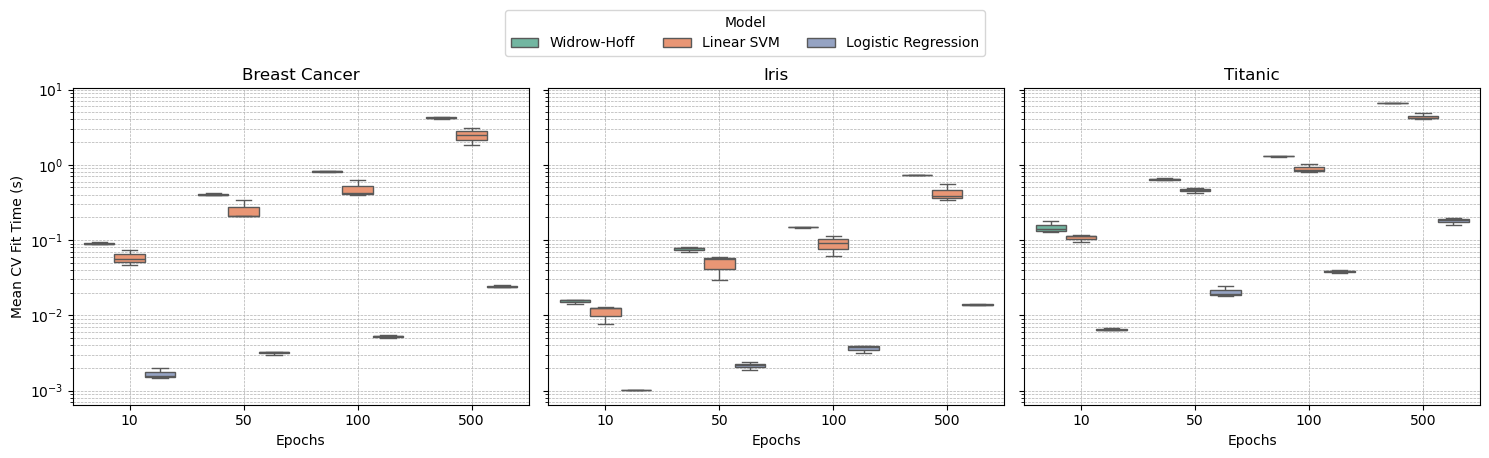

In [35]:
sns.set_palette("Set2")

for metric_name, metric_key in metrics.items():

    for param_name, param_key in parameters.items():
        fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
        handles, labels = None, None

        for ax, (dataset_name, df) in zip(axs, results.items()):
            
            plot_method = sns.boxplot
            
            ax = plot_method(
                data=df,
                x=param_key,
                y = metric_key,
                hue='param_classifier__model_class',
                ax=ax,
                dodge=True
            )
            
            
            if param_name == "Learning Rate":
                ax.invert_xaxis()

            if handles is None and labels is None:
                handles, labels = ax.get_legend_handles_labels()

            ax.get_legend().remove()

            title = dataset_name_map[dataset_name]

            ax.grid(True, which='both', linestyle='--', linewidth=0.5)

            if metric_key == "mean_fit_time":
                ax.set_yscale('log')
            else:
                ax.set_ylim(0, 1.05)

            ax.set(
                xlabel=param_name,
                ylabel=metric_name if ax is axs[0] else '',
                title=title,
            )

        fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, .95), title='Model', ncol=3)  # Improved legend position
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.85])
        plt.savefig(figure_dir / f"binary_model_comparison_{metric_key}_{param_key}.png", bbox_inches='tight')

# Weston Watkins SVM

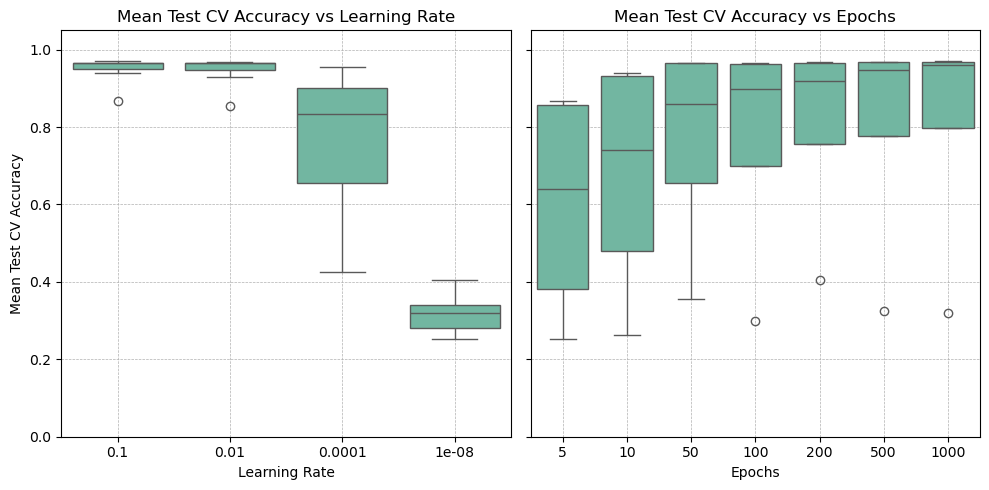

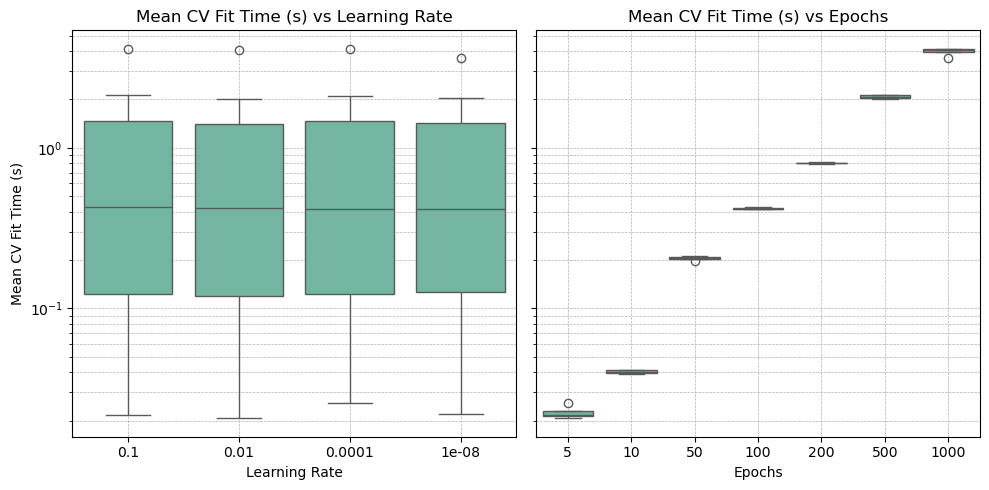

In [36]:
for metric_name, metric_key in metrics.items():
    
    handles, labels = None, None

    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True) 

    for ax, (param_name, param_key) in zip(axs, parameters.items()):

        ax = sns.boxplot(
            data=ww_svm_results,
            x=param_key,
            y = metric_key,
            hue='param_classifier__model_class',
            ax=ax,
            dodge=True,
            legend=False
        )

        if param_name == "Learning Rate":
            ax.invert_xaxis()

        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        if metric_key == "mean_fit_time":
            ax.set_yscale('log')
        else:
            ax.set_ylim(0, 1.05)

        title = f"{metric_name} vs {param_name}"
        ax.set(
            xlabel=param_name,
            ylabel=metric_name,
            title=title,
        )

    plt.tight_layout()
    plt.savefig(figure_dir / f"ww_svm_{metric_key}.png", bbox_inches='tight')